In [63]:
library(car)
library(ggplot2)
library(gmodels)
library(vcd)

# Part 1: Analysis of Co-Variance

*Purpose: Practice using ANCOVA*  

**Scenario:** You are interested in whether cell shape (`shape`) and solute concentration (`Na_sol`) affect absorption of materials into the cell. You conduct an experiment looking at "squamous", "cuboidal", and "columnar" cells in different concentrations of sodium solution. After 5 hours, you measure sodium (Na) in the cell.

## 1) Identify your independent and dependent variables and the type of data they are:

* **IV 1:** Cell shape (categorical, nominal)
* **IV 2:** Solution sodium concentration (meristic, ratio, continuous)
* **DV:** Cell sodium concentration (meristic, ratio, continuous)

## 2) State your research hypothesis and statistical hypotheses

* **Research hypothesis:** The amount of sodium absorbed by a cell depends on the cell's shape and the concentration of sodium in the cell's environment. 
* **Statistical hypotheses:** 
    * `INITIAL` $H_0: B_{squamous} = B_{cuboidal} = B_{columnar}$
    * `IF NO`   $H_0: B_{squamous}=0$; $B_{cuboidal}=0$; $B_{columnar}=0$
    * `IF YES`  $H_0: B0_{squamous} = B0_{cuboidal} = B0_{columnar}$
       

## 3) Interpret the output of the appropriate analysis (ANCOVA)

In [44]:
# import data
celldata <- read.csv('shape_NAsolution_HW10.csv')
str(celldata)

'data.frame':	36 obs. of  4 variables:
 $ EU    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ shape : Factor w/ 3 levels "columnar","cuboidal",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ Na_sol: num  0.01 0.03 0.05 0.07 0.09 0.11 0.13 0.15 0.17 0.19 ...
 $ Na    : num  0.0011 0.0033 0.0056 0.0078 0.01 0.0122 0.0127 0.0167 0.0189 0.0212 ...


### Step 1:

Create a linear model that includes both IVs *and* their interaction.

In [50]:
modcell <- lm(Na~shape+Na_sol+shape:Na_sol,data=celldata)

### Step 2: 

Look at the ANOVA table.  Because the interaction term has a p-value <<< 0.05, we say there is an interaction between the IVs and thus reject the null that the slopes of each shape are equal.  This means that the amount of sodium absorbed by the cell as a function of the environmental sodium concentration depends on the shape of the cell.

In [51]:
Anova(modcell, Type='II')

,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
shape,1.708354e-03,2,1258.4958,1.165215e-29
Na_sol,5.655257e-03,1,8332.1350,3.037762e-38
shape:Na_sol,5.260299e-04,2,387.5113,3.712764e-22
Residuals,2.036185e-05,30,NA,NA


### Step 3:

Create a linear model between `Na_sol` and `Na` for each shape individually. For each, test the null that the slope is equal to zero (by summarizing the model and calculating the confidence intervals).  Then plot the results.

In [9]:
# subset data by cell shape
squ_cell <- subset(celldata,shape=='squamous')
cub_cell <- subset(celldata,shape=='cuboidal')
col_cell <- subset(celldata,shape=='columnar')

In [14]:
# fit linear model to each subset
modsqu <- lm(Na~Na_sol,data=squ_cell)
modcub <- lm(Na~Na_sol,data=cub_cell)
modcol <- lm(Na~Na_sol,data=col_cell)

In [16]:
# is the squamous slope different from zero? (yes, p <<< 0.05)
summary(modsqu)
confint(modsqu)


Call:
lm(formula = Na ~ Na_sol, data = squ_cell)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0016001  0.0001100  0.0001343  0.0001638  0.0002532 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.0001012  0.0003099  -0.326    0.751    
Na_sol       0.1107790  0.0022608  49.001 3.03e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0005306 on 10 degrees of freedom
Multiple R-squared:  0.9959,	Adjusted R-squared:  0.9954 
F-statistic:  2401 on 1 and 10 DF,  p-value: 3.025e-13


,2.5 %,97.5 %
(Intercept),-0.0007916872,0.0005893577
Na_sol,0.1057417358,0.1158162736


In [17]:
# is the cuboidal slope different from zero? (yes, p <<< 0.05)
summary(modcub)
confint(modcub)


Call:
lm(formula = Na ~ Na_sol, data = cub_cell)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0023648 -0.0004972  0.0003542  0.0006952  0.0014010 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.0003715  0.0006979  -0.532    0.606    
Na_sol       0.1966843  0.0050914  38.631 3.22e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.001195 on 10 degrees of freedom
Multiple R-squared:  0.9933,	Adjusted R-squared:  0.9927 
F-statistic:  1492 on 1 and 10 DF,  p-value: 3.225e-12


,2.5 %,97.5 %
(Intercept),-0.001926658,0.001183563
Na_sol,0.185339990,0.208028638


In [18]:
# is the columnar slope different from zero? (yes, p <<< 0.05)
summary(modcol)
confint(modcol)


Call:
lm(formula = Na ~ Na_sol, data = col_cell)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0010286 -0.0002328 -0.0001049  0.0001198  0.0010451 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.0003844  0.0003337   1.152    0.276    
Na_sol      0.2474739  0.0024345 101.654   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0005714 on 10 degrees of freedom
Multiple R-squared:  0.999,	Adjusted R-squared:  0.9989 
F-statistic: 1.033e+04 on 1 and 10 DF,  p-value: < 2.2e-16


,2.5 %,97.5 %
(Intercept),-0.000359227,0.001127946
Na_sol,0.242049544,0.252898271


`geom_smooth()` using formula 'y ~ x'



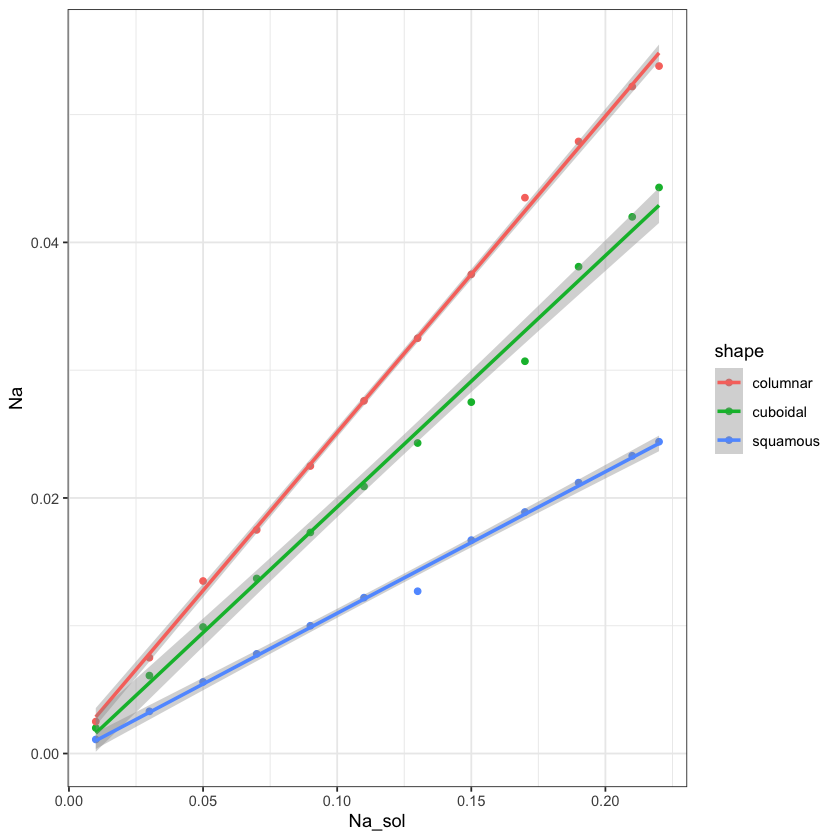

In [38]:
# plot results
graph <- ggplot(celldata, aes(x=Na_sol,y=Na,colour=shape)) + 
    geom_point() + 
    geom_smooth(se=TRUE,method='lm') + 
    theme_bw()
graph

**Are the cell type(s) different? How do you know? Explain the *effect* of different cell types on how the sodium concentration of the solution impacts sodium uptake by the cell**  

The cell types are different when it comes to absorbing sodium as a function of solution concentration.  As illustrated by the plot, the slopes of their respective linear models are significantly different.  This means that as the solution concentration increases, the amount of sodium absorbed by a columnar cell increases by more than a cuboidal cell, which increases by more than a squamous cell.  In other words, the solution concentration matters but so does the shape of the cell.

# Part 2: Contingency Tables

*Purpose: Practice using contingency tables to evaluate the effect of a categorical predictor on a categorical DV.*  

Test whether lovely leaping lizard color affects survival.

`Statistical Null` The frequencies of survival do not depend on the frequencies of color.  
`Alternative Hypothesis` The frequencies of survival do depend on the frequencies of color.

**The Pearson's Chi-squared test results in a p-value of 0.017, which is less than 0.05.  This means that we can reject the null that survival does not depend on color.  It appears that green is more advantageous than the other colors (standardized residual for 'yes' is greater than 2, 'no' is nearly -2).  The chi-squared contribution is also much higher for green than other colors (for both survival outcomes).**

In [53]:
# import data
lzdata <- read.csv('lizard_color_CT.csv')
str(lzdata)

'data.frame':	132 obs. of  2 variables:
 $ skin   : Factor w/ 3 levels "blue","brown",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ survive: Factor w/ 2 levels "no","yes": 2 2 2 2 2 2 2 2 2 2 ...


In [54]:
# create table
lztable <- table(lzdata$skin,lzdata$survive)
lztable

       
        no yes
  blue  20  17
  brown 48  36
  green  1  10

In [59]:
# run contingency table analysis
CrossTable(lztable,expected=TRUE)


 
   Cell Contents
|-------------------------|
|                       N |
|              Expected N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  132 

 
             |  
             |        no |       yes | Row Total | 
-------------|-----------|-----------|-----------|
        blue |        20 |        17 |        37 | 
             |    19.341 |    17.659 |           | 
             |     0.022 |     0.025 |           | 
             |     0.541 |     0.459 |     0.280 | 
             |     0.290 |     0.270 |           | 
             |     0.152 |     0.129 |           | 
-------------|-----------|-----------|-----------|
       brown |        48 |        36 |        84 | 
             |    43.909 |    40.091 |           | 
             |     0.381 |     0.417 |           | 
             |     0.571 |     0.429 |     0.636 | 
             |     0.696

In [60]:
chisq.test(lztable)$res

       
                no        yes
  blue   0.1498673 -0.1568416
  brown  0.6173659 -0.6460957
  green -1.9808869  2.0730700

ERROR: Error in if (split_vertical[i]) {: missing value where TRUE/FALSE needed


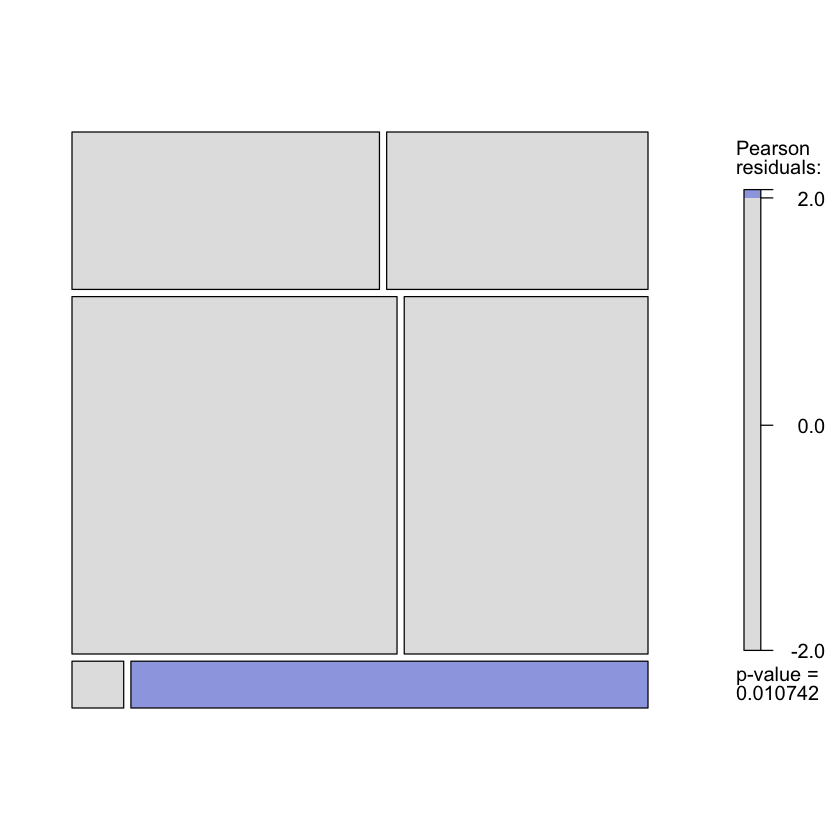

In [81]:
strucplot(lztable, shade=TRUE)
strucplot(lztable, shade=TRUE,gp = shading_Friendly)
grid.edit("rect:skin=green,survive=yes",
          gp = gpar(fill = "green"))

# Part 3: Read the 2011 paper by Burnham, Anderson, and Huyvaert

*Purpose: to take away from the reading a summary of this approach of making inferences. Focus on answering the questions and don't worry about getting bogged down in the math.*  

**1) From information on the second page of the article (pg. 24) summarize in 3-4 sentences (max) how the I-T method is different than null hypothesis testing.**  

The I-T approach involves forming a set of hypotheses, ranks them by their strength of evidence, then interprets the results based on model selection uncertainty.  In contrast, null hypothesis testing considers a single null hypothesis based on a test statistic and determines whether or not to reject the null through an arbitrary statistical threshold.  The I-T approach can be considered more wholistic because it views each hypothesis as containing some degree of novel information that, when taken together, allows for stronger inference than null hypothesis testing is capable of providing.  

**2) What is meant by "information lost" and why might we care about it?**  

Models are imperfect in terms of approximating full reality.  "Information lost" refers to the distance between a given model and the full reality it is approximating.  This concept is important because it not only provides a basis for understanding the efficacy of a particular model but also allows us to consider and compare different models.  

**3) The paper outlines 15 "technical issues" that crop up around this method. Pick just one and summarize the issue and their response in just two sentences.**  

The authors note that there has been confusion about the definition of "model probability" and they attempt to set the record straight.  The correct interpretation of "model probability" is that (1) one of the models is actually the theoretically best model, (2) we don't know for sure which one is the best model, and (3) "model probability" is the probability that a given model is the actual best model.  

**4) How important do you think the authors of this paper regard experimental design? What do you think they and Platt (recall from the beginning of the semester) might have to say to each other?**  

The authors of this paper likely hold experimental design as critically important and that it must come after the hard thinking and generation of hypotheses.  In this, they would be in complete agreement with Platt.  However, Platt seeks to identify a best hypothesis through an iterative process that eliminates weaker hypotheses.  The authors of this paper would push back on this approach by arguing that, while this may lead to the identification of the most probable "best" model, a better approach is to consider all of the hypotheses relative to each other.